In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
os.chdir('/content/')
import tensorflow as tf
from PIL import Image 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout



In [ ]:
data=[]
labels=[]
classes=43
cur_path = os.getcwd()

In [ ]:
cur_path

'/content'

### preprocessing the images



In [ ]:
for i in range(classes):
  path=os.path.join(cur_path,'/content/Train',str(i))
  images=os.listdir(path)
  for a in images:
    try:
      image=Image.open(path + '//' +a)
      image=image.resize((30,30))
      image=np.array(image)
      data.append(image)
      labels.append(i)
    except Exception as e:
      print(e)

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
os.mkdir('training')

In [ ]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [ ]:
data=np.load('/content/training/data.npy')
labels=np.load('/content/training/target.npy')

In [ ]:
data.shape

(39209, 30, 30, 3)

In [ ]:
labels.shape

(39209,)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=0)

In [ ]:
X_test.shape

(7842, 30, 30, 3)

In [ ]:
y_test.shape

(7842,)

In [ ]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

### build the model

In [ ]:
model =Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
981/981 [==============================] - 20s 6ms/step - loss: 1.7342 - accuracy: 0.5563 - val_loss: 0.4188 - val_accuracy: 0.9000
Epoch 2/20
981/981 [==============================] - 5s 5ms/step - loss: 0.5098 - accuracy: 0.8533 - val_loss: 0.1534 - val_accuracy: 0.9628
Epoch 3/20
981/981 [==============================] - 6s 6ms/step - loss: 0.3398 - accuracy: 0.9042 - val_loss: 0.0931 - val_accuracy: 0.9748
Epoch 4/20
981/981 [==============================] - 6s 6ms/step - loss: 0.2668 - accuracy: 0.9266 - val_loss: 0.0675 - val_accuracy: 0.9825
Epoch 5/20
981/981 [==============================] - 6s 6ms/step - loss: 0.2307 - accuracy: 0.9380 - val_loss: 0.0495 - val_accuracy: 0.9867
Epoch 6/20
981/981 [==============================] - 5s 5ms/step - loss: 0.2081 - accuracy: 0.9431 - val_loss: 0.0999 - val_accuracy: 0.9686
Epoch 7/20
981/981 [==============================] - 5s 6ms/step - loss: 0.2065 - accuracy: 0.9439 - val_loss: 0.0505 - val_accuracy: 0.9878
Epoch

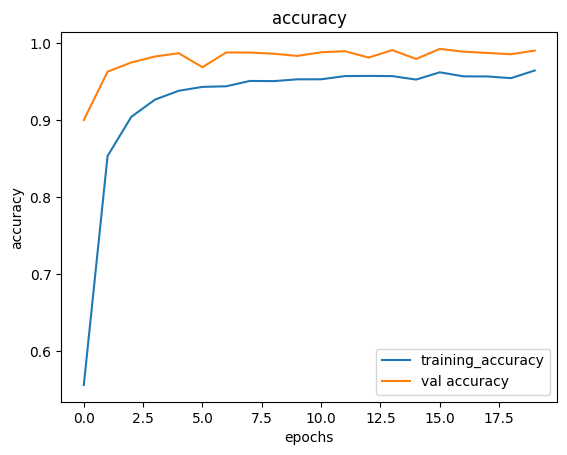

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training_accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

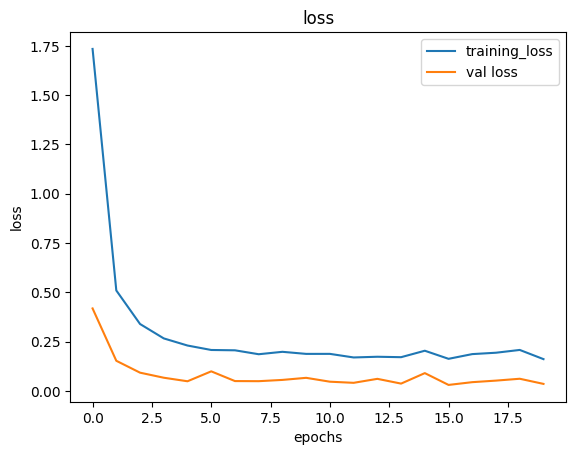

In [ ]:
plt.figure(0)
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
def testing(testcsv):
  y_test=pd.read_csv(testcsv)
  label=y_test['ClassId'].values
  imgs=y_test['Path'].values
  data=[]
  for img in imgs:
    image=Image.open(img)
    image=image.resize((30,30))
    data.append(np.array(image))
  X_test=np.array(data)
  return X_test,label

In [ ]:
X_test,label=testing('/content/Test.csv')

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

395/395 [==============================] - 1s 3ms/step


In [ ]:
classes_x

array([16,  1, 38, ..., 32,  7, 10])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,classes_x))

0.9551068883610452


In [ ]:
model.save('./training/TSR.h5')

In [ ]:
from keras.models import load_model 
model = load_model('/content/training/TSR.h5')

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    predict_x=model.predict(X_test) 
    classes_x=np.argmax(predict_x,axis=1)
    
    return image,classes_x

1/1 [==============================] - 0s 18ms/step
Predicted traffic sign is:  Speed limit (30km/h)


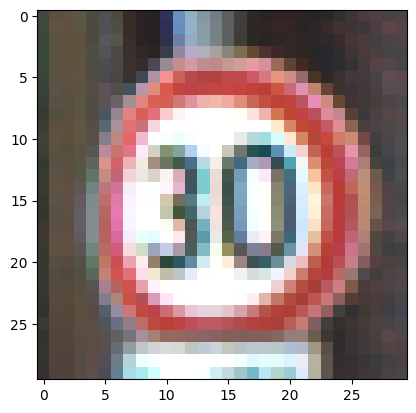

In [ ]:
plot,prediction = test_on_img(r'/content/Test/00001.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [ ]:
3